Epoch 1/20
110/110 [==============================] - 4s 24ms/step - loss: 0.0046
Epoch 2/20
110/110 [==============================] - 3s 27ms/step - loss: 1.1522e-04
Epoch 3/20
110/110 [==============================] - 2s 20ms/step - loss: 1.1776e-04
Epoch 4/20
110/110 [==============================] - 2s 20ms/step - loss: 1.1025e-04
Epoch 5/20
110/110 [==============================] - 2s 22ms/step - loss: 1.0901e-04
Epoch 6/20
110/110 [==============================] - 3s 24ms/step - loss: 1.0889e-04
Epoch 7/20
110/110 [==============================] - 3s 27ms/step - loss: 1.0195e-04
Epoch 8/20
110/110 [==============================] - 2s 21ms/step - loss: 1.0962e-04
Epoch 9/20
110/110 [==============================] - 2s 20ms/step - loss: 1.1013e-04
Epoch 10/20
110/110 [==============================] - 2s 20ms/step - loss: 8.8205e-05
Epoch 11/20
110/110 [==============================] - 2s 23ms/step - loss: 9.2589e-05
Epoch 12/20
110/110 [==============================] - 4

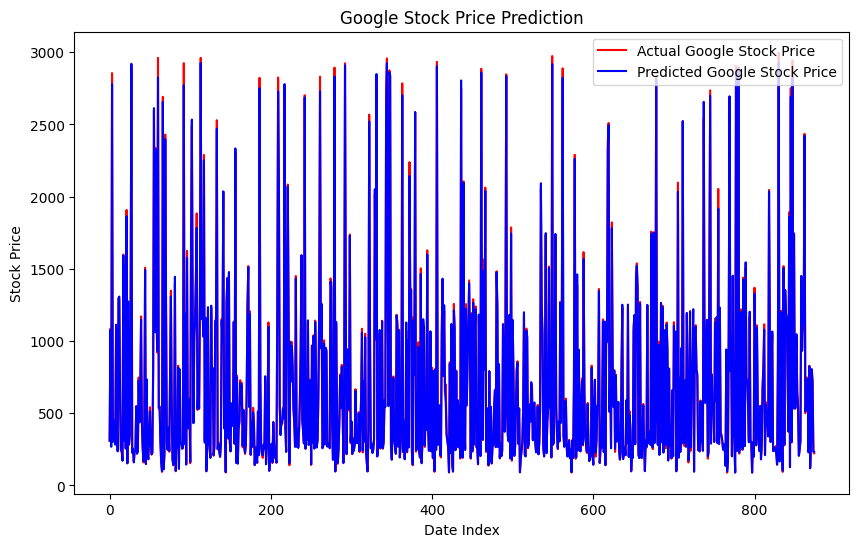

In [3]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the stock price data from a CSV file
data = pd.read_csv('GOOGL.csv')
data['Date'] = pd.to_datetime(data['Date'])  # Convert the 'Date' column to datetime format
data.sort_values('Date', inplace=True)  # Sort the data by date to maintain chronological order

# Fill any missing 'Close' price data with the previous day's price
data['Close'].fillna(method='ffill', inplace=True)

# Extract the 'Close' prices and reshape for scaling
close_prices = data['Close'].values.reshape(-1, 1)

# Scale the 'Close' prices to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices)

# Function to create sequences used by the LSTM
def create_sequences(data, sequence_length=60):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])  # Grab sequence_length values
        y.append(data[i, 0])  # Grab the next value
    return np.array(X), np.array(y)

# Prepare the input and output sequences
X, y = create_sequences(close_prices_scaled)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the LSTM model
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=False),
    Dense(1)
])

# Compile the model with an optimizer and loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Predict the stock prices using the testing set
predictions = model.predict(X_test)
# Inverse transform predictions back to normal prices
predictions = scaler.inverse_transform(predictions)

# Plot the actual prices and the predicted prices
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='red', label='Actual Google Stock Price')
plt.plot(predictions, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Date Index')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [1]:
import pandas as pd
df = pd.read_csv("HousingData.csv")
df.head()
df.isnull().sum()
df = df.dropna()

df.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
5    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
499  0.17783   0.0   9.69   0.0  0.585  5.569  73.5  2.3999    6  391   
500  0.22438   0.0   9.69   0.0  0.585  6.027  79.7  2.4982    6  391   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
5       18.7  394.12   5.21  28.7  
..       ...     ...    ...   ...  
499     19.2  395.77  15.10  17.5  
500     19.2  396.90  14.33  16.8  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  

[394 rows x 14 columns]>

In [2]:
df.shape

(394, 14)

In [3]:
from sklearn.model_selection import train_test_split
x = df.drop('MEDV',axis=1)
y = df['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(x_train)
x_train = mms.transform(x_train)
x_test = mms.transform(x_test)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential()

# Add the first hidden layer with 128 neurons, input dimension of 13 (as there are 13 features),
# 'normal' kernel initializer, and ReLU activation function
model.add(Dense(128, input_dim=13, kernel_initializer='normal', activation='relu'))

# Add the second hidden layer with 64 neurons and ReLU activation function
model.add(Dense(64, activation='relu'))

# Add the output layer with 1 neuron and linear activation function
model.add(Dense(1, activation="linear"))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=["mae"])

# Print a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
history=model.fit(x_train,y_train,epochs=100,batch_size=100,verbose=1,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 135ms/step - loss: 567.6273 - mae: 22.0370 - val_loss: 506.6527 - val_mae: 21.0468
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 561.6231 - mae: 21.8937 - val_loss: 501.3918 - val_mae: 20.9165
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 556.3624 - mae: 21.7667 - val_loss: 496.1455 - val_mae: 20.7863
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 550.7156 - mae: 21.6332 - val_loss: 490.0518 - val_mae: 20.6354
Epoch 5/100
3/3 [==============================] - 0s 27ms/step - loss: 544.2491 - mae: 21.4764 - val_loss: 482.6446 - val_mae: 20.4502
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 536.3358 - mae: 21.2830 - val_loss: 473.4239 - val_mae: 20.2156
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 526.5882 - mae: 21.0371 - val_loss: 461.8434 - val_mae: 19.9157
Epoch 8/100
3/3 [==============================

In [7]:
mse_value, mae_value = model.evaluate(x_test, y_test, verbose=0)

In [8]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [9]:
import matplotlib.pyplot as plt

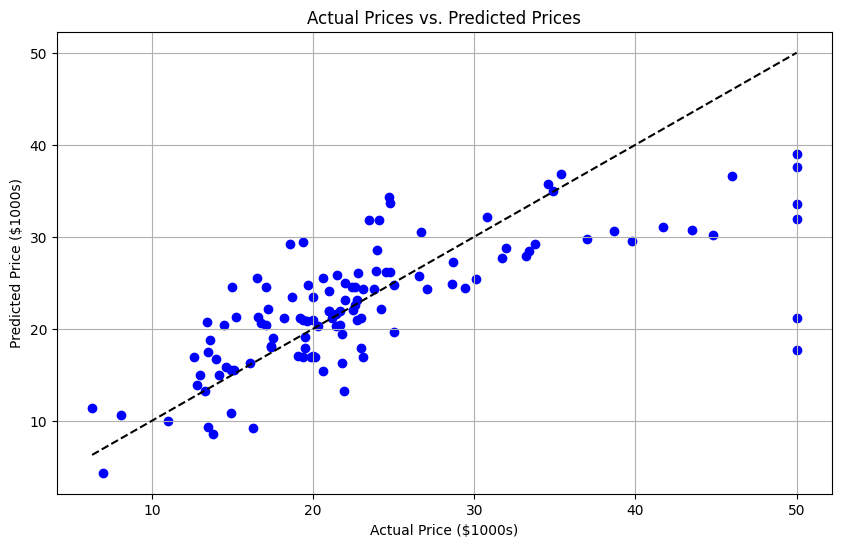

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black')
plt.xlabel('Actual Price ($1000s)')
plt.ylabel('Predicted Price ($1000s)')
plt.title('Actual Prices vs. Predicted Prices')
plt.grid(True)
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)

Mean Absolute Error:  4.523136338466355
Mean Squared Error:  45.32151457049741
